# Stock info

In [1]:
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib.pylab as plt
import csv
import numpy.random as npr
import scipy.stats as scs
from scipy.stats import norm
%matplotlib inline

from datetime import datetime
from datetime import date

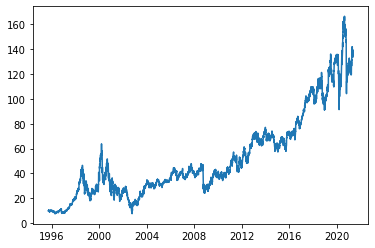

In [2]:
today = date.today()
from_date = datetime(1999,1,1)
sap = web.DataReader('SAP',  'yahoo', datetime(1985,1,1), today)
plt.plot(sap["Adj Close"]);

In [3]:
sap.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-05-10,141.059998,139.339996,140.889999,139.520004,833100.0,137.266052
2021-05-11,138.190002,136.360001,136.589996,137.830002,1113800.0,135.603363
2021-05-12,137.139999,135.119995,136.190002,135.500000,705000.0,133.310989
2021-05-13,136.110001,134.570007,135.559998,135.229996,611000.0,135.229996
2021-05-14,138.899994,136.729996,137.110001,138.820007,690800.0,138.820007


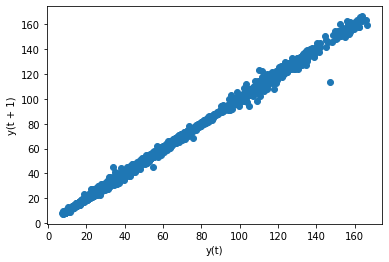

In [4]:
from pandas.plotting import lag_plot
lag_plot(sap["Adj Close"]);

In [5]:
sap['Log_Ret'] = np.log(sap['Close'] / sap['Close'].shift(1))
sap['Volatility'] = sap['Log_Ret'].rolling(center=False,window=252).std() * np.sqrt(252)
sap.tail()

,High,Low,Open,Close,Volume,Adj Close,Log_Ret,Volatility
Date,,,,,,,,
2021-05-10,141.059998,139.339996,140.889999,139.520004,833100.0,137.266052,-0.015786,0.380344
2021-05-11,138.190002,136.360001,136.589996,137.830002,1113800.0,135.603363,-0.012187,0.380327
2021-05-12,137.139999,135.119995,136.190002,135.500000,705000.0,133.310989,-0.017049,0.380654
2021-05-13,136.110001,134.570007,135.559998,135.229996,611000.0,135.229996,-0.001995,0.380646
2021-05-14,138.899994,136.729996,137.110001,138.820007,690800.0,138.820007,0.026201,0.381391


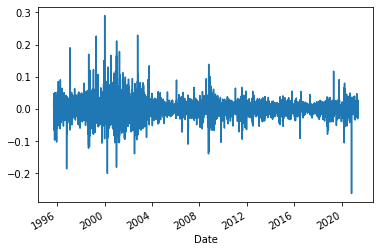

In [6]:
sap['Log_Ret'].plot();

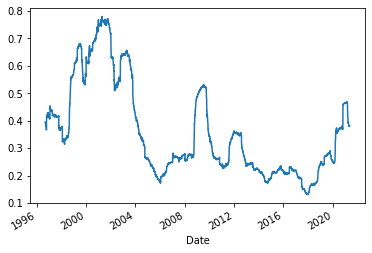

In [7]:
sap['Volatility'].plot();

In [8]:
quarterly_sap = sap.resample('q').mean()
quarterly_sap.tail()

,High,Low,Open,Close,Volume,Adj Close,Log_Ret,Volatility
Date,,,,,,,,
2020-06-30,124.505397,122.019048,123.361746,123.251270,8.556524e+05,120.357243,0.003756,0.361522
2020-09-30,160.031562,157.337031,158.883125,158.783124,5.774609e+05,156.217983,0.001672,0.373091
2020-12-31,130.162031,128.134063,129.337343,129.070625,1.391223e+06,126.985488,-0.002783,0.438052
2021-03-31,127.676721,125.763934,126.634262,126.741147,9.764213e+05,124.693643,-0.000984,0.452442
2021-06-30,138.569676,136.689033,137.488388,137.811612,9.350548e+05,135.728081,0.003958,0.383275


Let's make ourselves a simple portfolio

In [9]:
aapl = web.DataReader('AAPL',  'yahoo', from_date, today)
msft = web.DataReader('MSFT',  'yahoo', from_date, today)
jnj = web.DataReader('JNJ',  'yahoo', from_date, today)
amzn = web.DataReader('AMZN',  'yahoo', from_date, today)

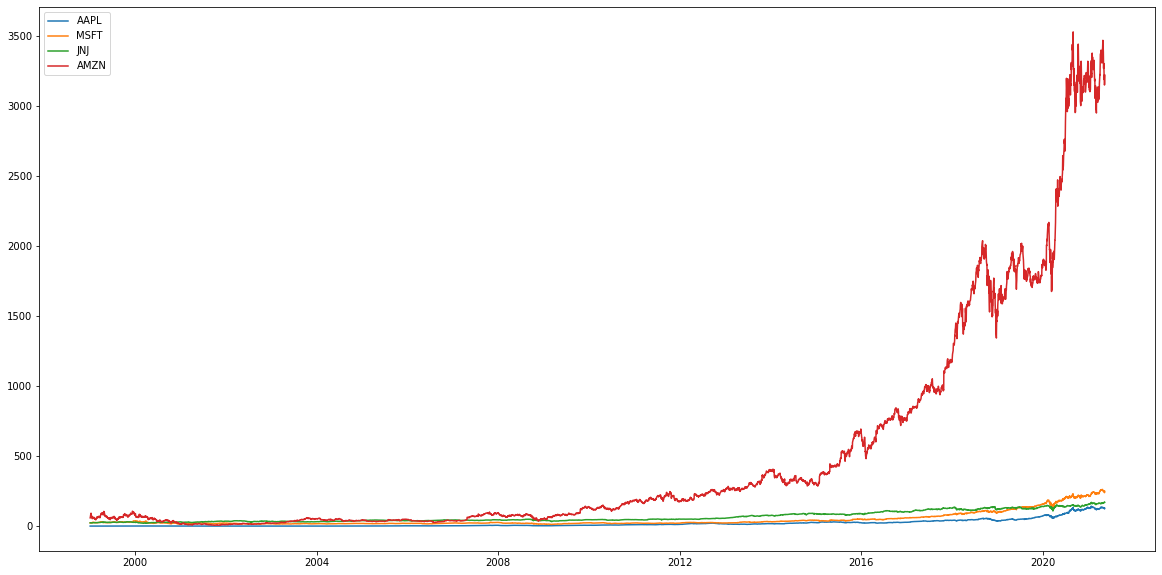

In [10]:
fig, ax = plt.subplots(figsize=(20, 10))
plt.plot(aapl['Adj Close'], label='AAPL');
plt.plot(msft['Adj Close'], label = 'MSFT');
plt.plot(jnj['Adj Close'], label = 'JNJ');
plt.plot(amzn['Adj Close'], label = 'AMZN');
plt.legend(loc=2);

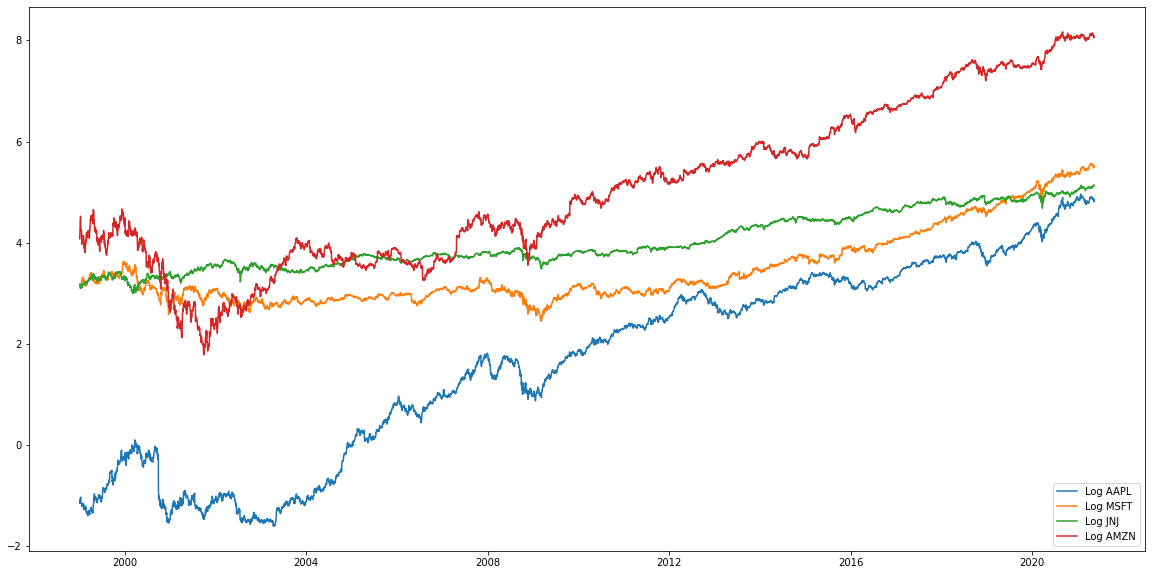

In [11]:
fig, ax = plt.subplots(figsize=(20, 10))
plt.plot(np.log(aapl['Adj Close']), label='Log AAPL');
plt.plot(np.log(msft['Adj Close']), label = 'Log MSFT');
plt.plot(np.log(jnj['Adj Close']), label = 'Log JNJ');
plt.plot(np.log(amzn['Adj Close']), label = 'Log AMZN');
plt.legend(loc=4);

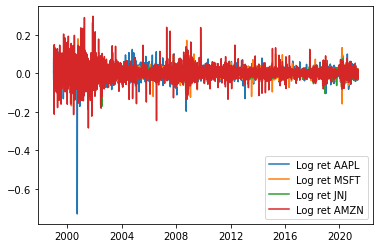

In [12]:
plt.plot(np.log(aapl['Adj Close']/aapl['Adj Close'].shift(1)), label='Log ret AAPL');
plt.plot(np.log(msft['Adj Close']/msft['Adj Close'].shift(1)), label = 'Log ret MSFT');
plt.plot(np.log(jnj['Adj Close']/jnj['Adj Close'].shift(1)), label = 'Log ret JNJ');
plt.plot(np.log(amzn['Adj Close']/amzn['Adj Close'].shift(1)), label = 'Log ret AMZN');
plt.legend(loc=4);